**ESTUDIO DESCRIPTIVO DE LOS DATOS IRIS**
1. Librerías a utilizar
2. Descripción estadística de los datos
3. Gráficos de rango de las variables
4. Gráficos de dispersión entre pares de variables
5. Conclusiones. Próximos pasos

#### 1. Librerías a utilizar
* numpy
* pandas
* matplotlib
* scipy

In [154]:
# Utilizamos librería pandas por que el tamaño de los datos es pequeño (150 items)
import pandas as pd
import numpy as np
# Importamos librería para mostrar histogramas
import matplotlib.pyplot as plt
# Los datos no contienen cabeceras
df = pd.read_csv("iris_clean.csv")
df


,Unnamed: 0,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,0,5.1,3.5,1.4,1.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


#### 1. Descripcion estadística de los datos

In [115]:
# Describe dataframe
df.describe()

,Unnamed: 0,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.205333
std,43.445368,0.828066,0.433594,1.764420,0.758733
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


#### 2. Gráficos de rango de las variables

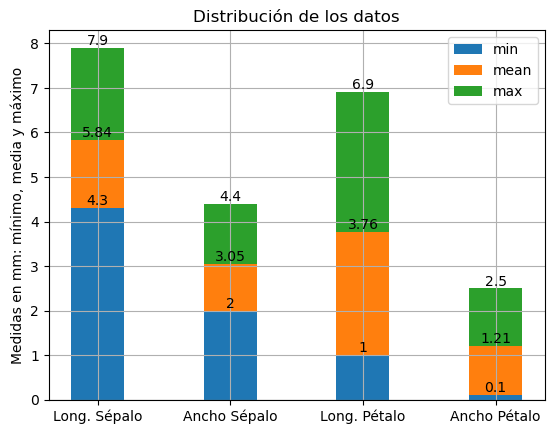

In [116]:
# X axis
M = 4 # longitud_sepalo, ancho_sepalo, longitud_petalo, ancho_petalo
x_index = np.arange(M)
# Y axis
N = 3 # min, mean, max
y_index = np.arange(N)
# Subplots
figure, axis = plt.subplots()
# Data
mins =  np.around(df.describe()['min':'min'].values[:2][0][1:], decimals=2)
means = np.around(df.describe()['mean':'mean'].values[:2][0][1:], decimals=2)
maxs =  np.around(df.describe()['max':'max'].values[:2][0][1:], decimals=2)
# mins =                    [ 4.30, 2.00, 1.00, 0.10, ]
# means =                   [ 5.84, 3.05, 3.76, 1.21, ]
# maxs =                    [ 7.90, 4.40, 6.90, 2.50, ]
means_mins =  np.subtract(means, mins)
maxs_means =  np.subtract(maxs, means)
# For each measure
medidas = ['min', 'mean', 'max']
bar_min = axis.bar(x=x_index, height=mins, width=0.4, label=medidas[0])
bar_mean = axis.bar(x=x_index, height=means_mins, width=0.4, label=medidas[1], bottom=mins)
bar_max = axis.bar(x=x_index, height=maxs_means, width=0.4, label=medidas[2], bottom=means)
# Label bars
axis.bar_label(bar_min, label_type='edge')
axis.bar_label(bar_mean, label_type='edge')
axis.bar_label(bar_max, label_type='edge')
axis.axhline(0, color='grey', linewidth=0.8)
axis.set_ylabel('Medidas en mm: mínimo, media y máximo')
axis.set_title('Distribución de los datos')
axis.grid(visible=True)
axis.legend()
variables = ['Long. Sépalo', 'Ancho Sépalo', 'Long. Pétalo', 'Ancho Pétalo', ]
axis.set_xticks(x_index, labels=variables)
# Configure plot
plt.show()

#### 3. Gráficos de dispersión entre pares de variables

In [152]:
# Divide dataframe in 4 series
serie_longitud_sepalo = df["longitud_sepalo"]
serie_ancho_sepalo = df["ancho_sepalo"]
serie_longitud_petalo = df["longitud_petalo"]
serie_ancho_petalo = df["ancho_petalo"]
print(serie_ancho_petalo.values)
# X-axis and Y-axis
series = []
series.append(serie_longitud_sepalo.values)
series.append(serie_ancho_sepalo.values)
series.append(serie_longitud_petalo.values)
series.append(serie_ancho_petalo.values)


[1.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]


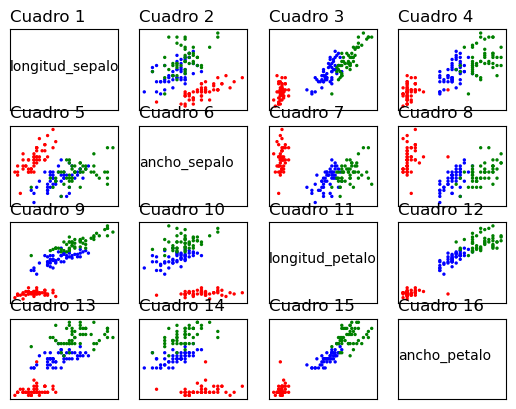

In [161]:
# Show a grid of plots
from matplotlib.gridspec import GridSpec
gs = GridSpec(4, 4)
a_ax = []
variables = [
  'longitud_sepalo',
  'ancho_sepalo',
  'longitud_petalo',
  'ancho_petalo',
]
# Colores: Setosa=rojo, Versicolor=azul y Virgínica=verde
colors = ['red'] * 50 + ['blue'] * 50 + ['green'] * 50
for i in range(4):
  a_fila = []
  for j in range(4):
    mi_plot = plt.subplot(gs[i, j],)
    mi_plot.set_title(label=f"Cuadro {(i*4)+j+1}", loc='left')
    mi_plot.set_xticks([])
    mi_plot.set_yticks([])
    if i != j:
      mi_plot.scatter(x=series[j], y=series[i], s=2.0, c=colors)
    else:
      mi_plot.text(x=0, y=0.5, s=variables[i])
    a_fila.append(mi_plot)
  a_ax.append(a_fila)
plt.show()

#### 4. Conclusiones. Próximos pasos

Cada uno de los gráficos de dispersión mostrados en el grid muestra los puntos correspondientes al valor de 2 variables. Se distinguen en colores los valores correspondientes a cada especie (Setosa=rojo, Versicolor=azul y Virgínica=verde)

Del análisis de dichos gráficos se intuyen las siguientes correlaciones en los datos:
* Parece haber correlación entre "Longitud del sépalo" y "Ancho del sépalo" para la especie Setosa (CUADRO 2 en rojo)
* Parece no haber correlación de "Longitud del sépalo" y "Longitud del pétalo" para la especie Setosa (CUADRO 3 en rojo)
* Parece haber correlación entre "Longitud del sépalo" y "Longitud del pétalo" para las especies Versicolor y Virgínica (cuandrantes 3 colores azul y verde)
* ..

Sería conveniente realizar un análisis de la correlación de algunas de las variables, teniendo en cuenta:
* CUADRO 2 -> Analizar la correlación entre "Longitud del sépalo" y "Ancho del sépalo" para la especie Setosa (rojo)
* CUADRO 3 -> Analizar la correlación entre "Longitudd del sépalo" y "Longitud del pétalo" para las especies Versicolor (azul) y Virgínica(verde)
* CUADRO 12 -> Analizar la correlación entre "Longitud del pétalo" y "Ancho del pétalo" para TODAS las especies